In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
import seaborn as sns
from keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
print(tf.__version__)

2.1.0


Gold data from https://www.investing.com/currencies/xau-usd-historical-data

In [30]:
data = pd.read_csv('resources/XAU_USD Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Change %
0,"Nov 30, 2020","1,781.29","1,786.84","1,787.61","1,764.66",-0.31%
1,"Nov 29, 2020","1,786.84","1,787.25","1,789.99","1,785.56",-0.07%
2,"Nov 27, 2020","1,788.13","1,811.09","1,813.81","1,773.93",-1.24%
3,"Nov 26, 2020","1,810.57","1,805.74","1,818.78","1,805.31",0.29%
4,"Nov 25, 2020","1,805.30","1,807.69","1,817.98","1,801.33",-0.12%


In [31]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Price,Open,High,Low,Change %
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%


In [32]:
BTC_data = pd.read_csv('resources/BTC_USD Bitfinex Historical Data.csv', usecols = ['Date','BTC_Price'])
BTC_data.head()

,Date,BTC_Price
0,30-Nov-20,"19,560.00"
1,29-Nov-20,"18,196.00"
2,28-Nov-20,"17,746.00"
3,27-Nov-20,"17,169.30"
4,26-Nov-20,"17,219.00"


In [33]:
BTC_data['Date'] = pd.to_datetime(BTC_data['Date'])
BTC_data.head()

,Date,BTC_Price
0,2020-11-30,"19,560.00"
1,2020-11-29,"18,196.00"
2,2020-11-28,"17,746.00"
3,2020-11-27,"17,169.30"
4,2020-11-26,"17,219.00"


In [34]:
SP_data = pd.read_csv('resources/SP500Data.csv', usecols = ['Date','SP_Price'])
SP_data.head()

,Date,SP_Price
0,30-Nov-20,"3,621.63"
1,27-Nov-20,"3,638.35"
2,25-Nov-20,"3,629.65"
3,24-Nov-20,"3,635.41"
4,23-Nov-20,"3,577.59"


In [35]:
SP_data['Date'] = pd.to_datetime(SP_data['Date'])
SP_data.head()

,Date,SP_Price
0,2020-11-30,"3,621.63"
1,2020-11-27,"3,638.35"
2,2020-11-25,"3,629.65"
3,2020-11-24,"3,635.41"
4,2020-11-23,"3,577.59"


In [36]:
data = pd.merge(data, BTC_data, on='Date', how='left')
data 

,Date,Price,Open,High,Low,Change %,BTC_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00"
...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,NaN
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,NaN
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,NaN
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,NaN


In [37]:
data = pd.merge(data, SP_data, on='Date', how='left')
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00",NaN
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00",NaN
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,NaN,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,NaN,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,NaN,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,NaN,"1,132.99"


In [39]:
data = data.ffill(axis=0)
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"


In [40]:
data.dropna()

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2020-11-30,"1,781.29","1,786.84","1,787.61","1,764.66",-0.31%,"19,560.00","3,621.63"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
...,...,...,...,...,...,...,...,...
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"


In [41]:
data = data[::-1]
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
2842,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%,6.1,"1,132.99"
2841,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"
2840,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
2839,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
2838,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
...,...,...,...,...,...,...,...,...
4,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
3,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
2,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
1,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"


In [42]:
data = data.reset_index(drop=True)
data

,Date,Price,Open,High,Low,Change %,BTC_Price,SP_Price
0,2010-01-01,"1,097.35","1,097.25","1,097.90","1,097.05",0.10%,6.1,"1,132.99"
1,2010-01-04,"1,120.40","1,096.25","1,123.80","1,093.45",2.10%,6.1,"1,132.99"
2,2010-01-05,"1,119.05","1,121.30","1,128.10","1,115.25",-0.12%,6.1,"1,136.52"
3,2010-01-06,"1,138.90","1,118.40","1,140.60","1,116.00",1.77%,6.1,"1,137.14"
4,2010-01-07,"1,132.30","1,138.20","1,139.15","1,128.60",-0.58%,6.1,"1,141.69"
...,...,...,...,...,...,...,...,...
2838,2020-11-25,"1,805.30","1,807.69","1,817.98","1,801.33",-0.12%,"18,730.00","3,629.65"
2839,2020-11-26,"1,810.57","1,805.74","1,818.78","1,805.31",0.29%,"17,219.00","3,638.35"
2840,2020-11-27,"1,788.13","1,811.09","1,813.81","1,773.93",-1.24%,"17,169.30","3,638.35"
2841,2020-11-29,"1,786.84","1,787.25","1,789.99","1,785.56",-0.07%,"18,196.00","3,621.63"


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Price      2843 non-null   object        
 2   Open       2843 non-null   object        
 3   High       2843 non-null   object        
 4   Low        2843 non-null   object        
 5   Change %   2843 non-null   object        
 6   BTC_Price  2843 non-null   object        
 7   SP_Price   2843 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 177.8+ KB


In [44]:
data["Price"] = data["Price"].str.replace(",","").astype(float)
data["High"] = data["High"].str.replace(",","").astype(float)
data["Low"] = data["Low"].str.replace(",","").astype(float)
data["BTC_Price"] = data["BTC_Price"].str.replace(",","").astype(float)
data["SP_Price"] = data["SP_Price"].str.replace(",","").astype(float)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Price      2843 non-null   float64       
 2   Open       2843 non-null   object        
 3   High       2843 non-null   float64       
 4   Low        2843 non-null   float64       
 5   Change %   2843 non-null   object        
 6   BTC_Price  2843 non-null   float64       
 7   SP_Price   2843 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 177.8+ KB


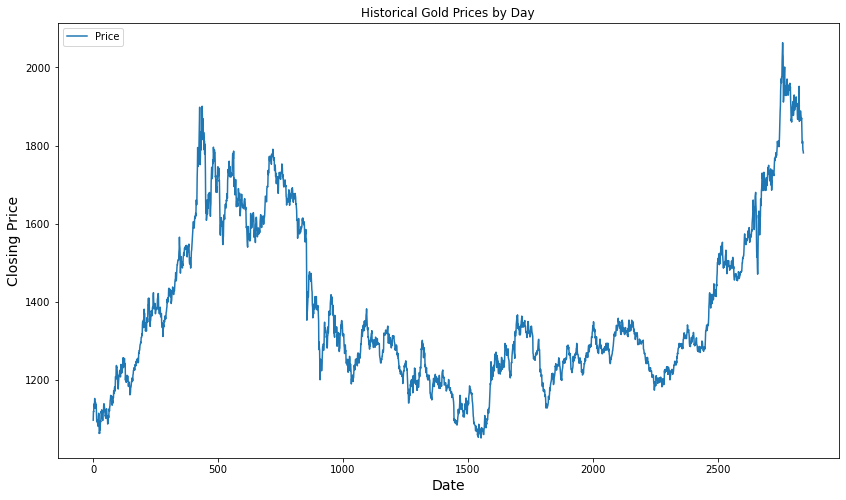

In [46]:
# plot close price vs. time to review completeness and shape of data

data.plot(y='Price', figsize=(14,8))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.title('Historical Gold Prices by Day')
plt.show()

Skewness: %f 0.8779153188535712
Kurtosis: -0.144369


C:\Users\dave\anaconda3\envs\PythonAdv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


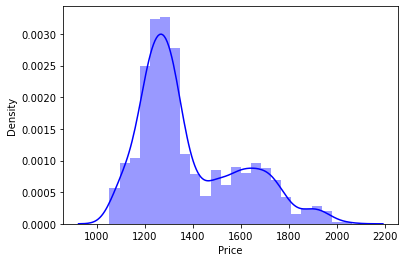

In [47]:
# check target variable

sns.distplot(data['Price'], color = 'blue')
print('Skewness: %f', data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

In [48]:
data = data.drop(['Open', 'Change %'], axis=1)
data

,Date,Price,High,Low,BTC_Price,SP_Price
0,2010-01-01,1097.35,1097.90,1097.05,6.1,1132.99
1,2010-01-04,1120.40,1123.80,1093.45,6.1,1132.99
2,2010-01-05,1119.05,1128.10,1115.25,6.1,1136.52
3,2010-01-06,1138.90,1140.60,1116.00,6.1,1137.14
4,2010-01-07,1132.30,1139.15,1128.60,6.1,1141.69
...,...,...,...,...,...,...
2838,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
2839,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
2840,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
2841,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63


In [49]:
data.to_csv(r'resources\Cleaned_10_Yr_Gold_Data.csv', index = False)

In [50]:
data.tail()

,Date,Price,High,Low,BTC_Price,SP_Price
2838,2020-11-25,1805.30,1817.98,1801.33,18730.0,3629.65
2839,2020-11-26,1810.57,1818.78,1805.31,17219.0,3638.35
2840,2020-11-27,1788.13,1813.81,1773.93,17169.3,3638.35
2841,2020-11-29,1786.84,1789.99,1785.56,18196.0,3621.63
2842,2020-11-30,1781.29,1787.61,1764.66,19560.0,3621.63


In [ ]:
test = data.tail(100)
#test

In [ ]:
High = test.High.values
Low = test.Low.values
Price = test.Price.values

In [ ]:
X = []
y = []

for i in range(len(High)):
    row = []
    yrow = []
    row.append(High[i])
    row.append(Low[i])
#     row.append(Volume[i])
    yrow.append(Price[i])
    X.append(row)
    y.append(yrow)
X = np.array(X)
y = np.array(y)
#X

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(X_train)

In [ ]:
price = np.array(X_train)
price2 = np.array(X_train)
price_normalizer = preprocessing.Normalization(input_shape=[1,])
price_normalizer.adapt(price)
price_normalizer2 = preprocessing.Normalization(input_shape=[1,])
price_normalizer2.adapt(price2)

In [ ]:
price_model = tf.keras.Sequential([
#price_normalizer,
    layers.Dense(50, activation='relu', input_dim=2),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(25, activation='relu'),
    layers.Dense(units=1)
])

In [ ]:
price_model.predict(X_test[:10])

In [ ]:
price_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.0001),
    loss='mean_absolute_error', metrics=['accuracy'])

In [ ]:
%%time
history = price_model.fit(
    X_train, y_train,
    epochs=300,
    # suppress logging
    verbose=2,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

In [ ]:
price_model.save("gold")

In [ ]:
from tensorflow import keras

loaded_model = keras.models.load_model("gold")

In [ ]:
# test cell to test model
prediction = loaded_model.predict([[1800, 1825]])
print(prediction[0][0])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail(10)

In [ ]:
predict = price_model.predict(X)
predict

In [ ]:
test_plt = test['Price'].reset_index().drop(columns='index')
plt.plot(test_plt, c='purple')
plt.plot(predict, c='g')


In [ ]:
# convert predictions array above to a dataframe for future export to csv

predict_df = pd.DataFrame(predict, columns = ['Prediction'])
predict_df

In [ ]:
predict_df.info()

In [ ]:
last_100_df = data.iloc[-100:]
last_100_df

In [ ]:
last_100_df = last_100_df.reset_index(drop=True)
last_100_df

In [ ]:
last_100_df = pd.concat([last_100_df, predict_df], axis=1)
last_100_df

In [ ]:
last_100_df = last_100_df[['Date', 'Price', 'Prediction', 'Low', 'High']]
last_100_df

In [ ]:
#last_100_df.to_csv(r'resources\100_Days_Gold_Predict.csv', index = False)

In [ ]:
last_30_df = last_100_df.iloc[-30:]
last_30_df

In [ ]:
last_30_df.to_csv(r'resources\30_Days_Gold_Predict.csv', index = False)